In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
url = '../data/Online-Retail-France.xlsx'
df0 = pd.read_excel(url)
print("There are {} rows and {} columns".format(df0.shape[0], df0.shape[1]))

There are 8557 rows and 7 columns


In [7]:
df0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0


In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8557 non-null   object 
 1   StockCode    8557 non-null   object 
 2   Description  8557 non-null   object 
 3   Quantity     8557 non-null   int64  
 4   InvoiceDate  8557 non-null   object 
 5   UnitPrice    8557 non-null   float64
 6   CustomerID   8491 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 468.1+ KB


In [9]:
print("The number of unique Description values in the input file is {}".format(len(df0['Description'].unique())))

The number of unique Description values in the input file is 1565


In [10]:
df1 = df0
df1['Description'] = df0['Description'].str.strip()

In [11]:
print("After cleaning, the number of unique Description values in the input file is {}".format(len(df1['Description'].unique())))

After cleaning, the number of unique Description values in the input file is 1564


In [16]:
print("Rows with missing InvoiceNo before removing")
df1[df1['InvoiceNo'].isna()]

Rows with missing InvoiceNo before removing


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


In [ ]:
df2 = df1.dropna(axis=0, subset=['InvoiceNo'])
print("There are {} rows and {} columns".format(df2.shape[0], df2.shape[1]))

There are 8557 rows and 7 columns


In [17]:
print("Rows with missing InvoiceNo after removing")
df2[df2['InvoiceNo'].isna()]

Rows with missing InvoiceNo after removing


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


In [18]:
print("There are {} rows containing 'C' in 'InvoiceNo'"\
      .format(sum(df2['InvoiceNo'].str.contains('C'))))

There are 149 rows containing 'C' in 'InvoiceNo'


In [19]:
df3 = df2[~df2['InvoiceNo'].str.contains('C')]

In [20]:
print("After removal, there are {} rows containing 'C' in 'InvoiceNo'"\
      .format(sum(df3['InvoiceNo'].str.contains('C'))))
print("There are {} rows and {} columns".format(df3.shape[0], df3.shape[1]))

After removal, there are 0 rows containing 'C' in 'InvoiceNo'
There are 8408 rows and 7 columns


In [21]:
container = 'Description'
target = 'POSTAGE'
print("There are {} rows containing {} in {}"\
      .format(sum(df3[container].str.contains(target)), target, container))

There are 300 rows containing POSTAGE in Description


In [23]:
df = df3[~df3[container].str.contains(target)]
print("After cleaning there are {} rows containing {} in {}"\
      .format(sum(df[container].str.contains(target)), target, container))
print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))

After cleaning there are 0 rows containing POSTAGE in Description
There are 8108 rows and 7 columns


In [24]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
count,8108,8108,8108,8108.000000,8108,8108.000000,8042.000000
unique,387,1541,1562,NaN,388,NaN,NaN
top,570672,23084,RABBIT NIGHT LIGHT,NaN,2011-10-11 14:52:00,NaN,NaN
freq,259,74,74,NaN,259,NaN,NaN
mean,NaN,NaN,NaN,13.724593,NaN,3.839639,12679.898533
std,NaN,NaN,NaN,21.353250,NaN,66.583173,281.236979
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12413.000000
25%,NaN,NaN,NaN,6.000000,NaN,1.000000,12571.000000
50%,NaN,NaN,NaN,10.000000,NaN,1.650000,12674.000000
75%,NaN,NaN,NaN,12.000000,NaN,2.950000,12689.000000


In [28]:
basket = (df
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo')) # in this way, InvoiceNo is not a column anymore
basket.shape

(387, 1562)

In [29]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True
    
basket_sets = basket.map(encode_units)
basket_sets.describe()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387,387,387,387,387,387,387,387,387,387,...,387,387,387,387,387,387,387,387,387,387
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,375,381,386,385,381,380,380,386,378,381,...,384,385,386,386,386,380,386,383,386,385


In [30]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537065,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
step = 0.01
min_support = 1
min_rules = 20
metric = 'lift'
min_threshold = 1
while True:
    frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)
    if frequent_itemsets.shape[0]>0:
        rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)
    if frequent_itemsets.shape[0] >0 and rules.shape[0]>=min_rules:
        break
    else:
        min_support -= step

In [32]:
print("'min_support'={:4.2f}, 'metric'={}, 'min_threshold'={}, number of frequent itemsets={}, number of rules={}"\
      .format(min_support, metric, min_threshold, frequent_itemsets.shape[0], rules.shape[0]))

'min_support'=0.08, 'metric'=lift, 'min_threshold'=1, number of frequent itemsets=41, number of rules=20


In [33]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.098191,0.095607,0.080103,0.815789,8.532717,1.0,0.070716,4.909561,0.978926,0.704545,0.796316,0.826814
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.095607,0.098191,0.080103,0.837838,8.532717,1.0,0.070716,5.561154,0.976129,0.704545,0.820181,0.826814
2,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.170543,0.139535,0.090439,0.530303,3.800505,1.0,0.066643,1.831958,0.888385,0.411765,0.454136,0.589226
3,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.139535,0.170543,0.090439,0.648148,3.800505,1.0,0.066643,2.357405,0.856371,0.411765,0.575805,0.589226
4,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.173127,0.170543,0.103359,0.597015,3.500678,1.0,0.073834,2.058283,0.863906,0.430108,0.514158,0.601538
5,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.170543,0.173127,0.103359,0.606061,3.500678,1.0,0.073834,2.098986,0.861215,0.430108,0.523580,0.601538
6,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.173127,0.139535,0.105943,0.611940,4.385572,1.0,0.081786,2.217352,0.933613,0.512500,0.549012,0.685600
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.139535,0.173127,0.105943,0.759259,4.385572,1.0,0.081786,3.434705,0.897165,0.512500,0.708854,0.685600
8,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.139535,0.134367,0.103359,0.740741,5.512821,1.0,0.084610,3.338870,0.951351,0.606061,0.700498,0.754986
9,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.134367,0.139535,0.103359,0.769231,5.512821,1.0,0.084610,3.728682,0.945672,0.606061,0.731809,0.754986


In [34]:
sorted_rules=rules.sort_values(by=['lift','confidence'],ascending=False).reset_index(drop=True)
sorted_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.095607,0.098191,0.080103,0.837838,8.532717,1.0,0.070716,5.561154,0.976129,0.704545,0.820181,0.826814
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.098191,0.095607,0.080103,0.815789,8.532717,1.0,0.070716,4.909561,0.978926,0.704545,0.796316,0.826814
2,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.103359,0.129199,0.100775,0.975000,7.546500,1.0,0.087421,34.832041,0.967487,0.764706,0.971291,0.877500
3,(SET/6 RED SPOTTY PAPER PLATES),"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",0.129199,0.103359,0.100775,0.780000,7.546500,1.0,0.087421,4.075640,0.996196,0.764706,0.754640,0.877500
4,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.103359,0.139535,0.100775,0.975000,6.987500,1.0,0.086353,34.418605,0.955664,0.709091,0.970946,0.848611


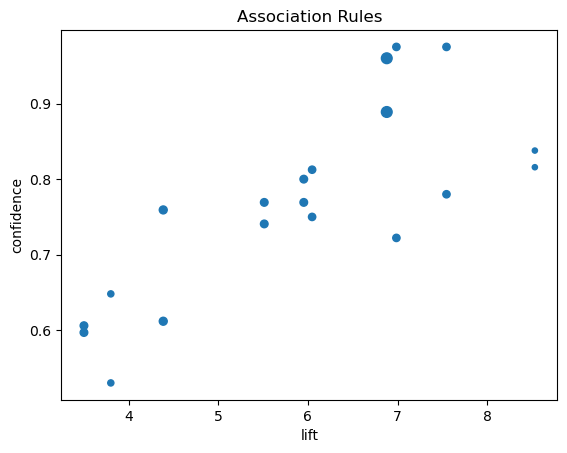

In [35]:
sorted_rules.plot.scatter(x='lift',y='confidence',s=3**(sorted_rules['support']*30),title='Association Rules');

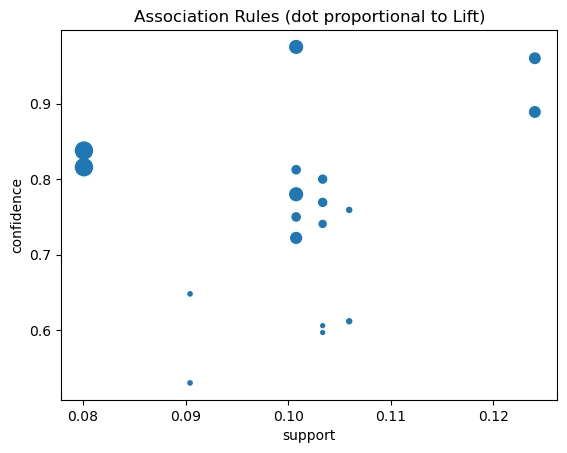

In [36]:
s = [1.8**n for n in rules.lift]
rules.plot.scatter(x='support', 
                   y='confidence', 
                   title='Association Rules (dot proportional to Lift)', 
                   s=s);